# The lapiradist problem

## Introduction
The lapidarist problem is to create a model that can predict the price of some diamonds, for this we are given a big dataset.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('diamonds_data.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df_na = df.isna().sum()
print('NA values:')
df_na/len(df)

NA values:


carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

## Profiling of data completeness and quality

It seems that this dataset does not contain NA values and it has enough samples to develop several models.

## Description of the parameters
* carat:	Carat weight of the diamond
* cut:	Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal
* color:	Color of the diamond, with D being the best and J the worst
* clarity:	How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
* depth:	depth % :The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
* table:	table%: The width of the diamond's table expressed as a percentage of its average diameter
* price:	The price of the diamond in muggle money
* x:	length of the diamond in mm
* y:	width of the diamond in mm
* z:	depth of the diamond in mm






## Descriptive analysis and summary statistics

In [ ]:
df.shape

(53930, 10)

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000
mean,0.797976,61.749325,57.457328,3933.054942,5.731236,5.734601,3.538776
std,0.474035,1.432711,2.234578,3989.628569,1.121807,1.142184,0.705729
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5325.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


* There is something odd about the min values in x, y and z predictors. They should be bigger than zero

In [ ]:
zero_index = df[(df.x == 0) | (df.y == 0) | (df.z == 0)].index
print('Count', df[(df.x == 0) | (df.y == 0) | (df.z == 0)].price.count())

Count 20


* We proceed to eleminate those rows given that their size (20) is very small compared with full dataset (53930).

In [ ]:
df_cate = df.copy()
df.drop(zero_index, inplace = True)
df.describe()

,carat,depth,table,price,x,y,z
count,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000
mean,0.797734,61.749434,57.456978,3931.248210,5.731706,5.734962,3.540089
std,0.473819,1.432420,2.234152,3987.469164,1.119469,1.140175,0.702560
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

## Graphs

Thanks that we were given the meaning of the predictors, it is possible to convert the categorical variables to numerical ones.

But before, let's explore the categorical values.



**Price vs Cut**

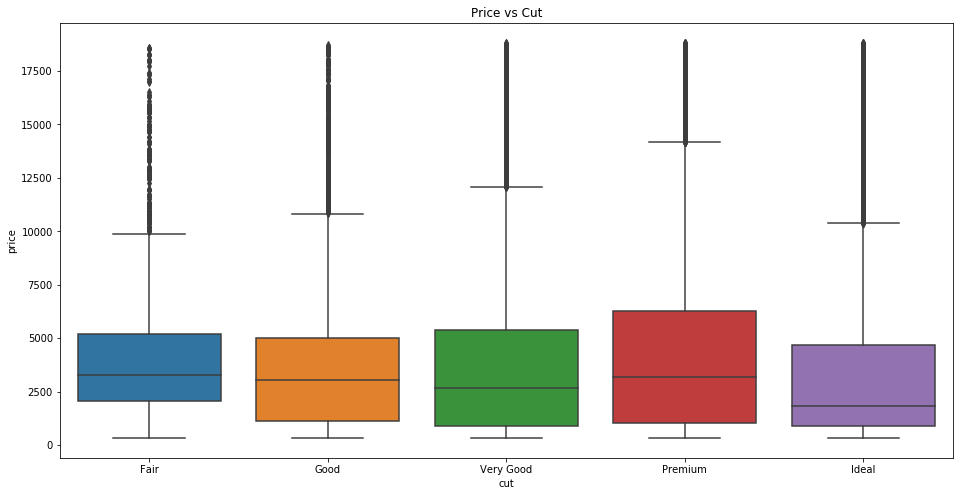

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('Price vs Cut')
p = sns.boxplot(x='cut', y='price',order = ["Fair", "Good", "Very Good", "Premium", "Ideal"], data=df)

It looks like Ideal cuts are no meaning of higher prices, maybe is because better cuts tend to reduce the size of the gem.

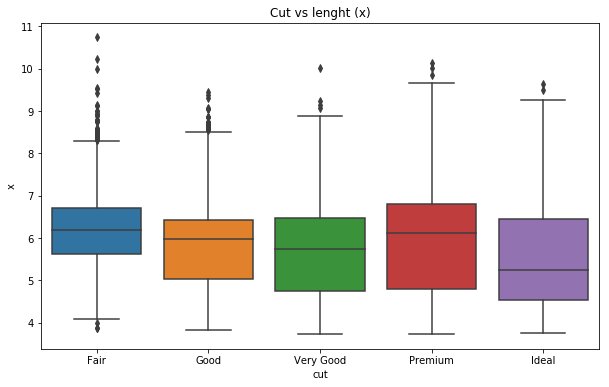

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Cut vs lenght (x)')
p = sns.boxplot(x='cut', y='x',order = ["Fair", "Good", "Very Good", "Premium", "Ideal"], data=df)

The last graph above shows that a great portion of ideal cuts are shorter than the other ones.

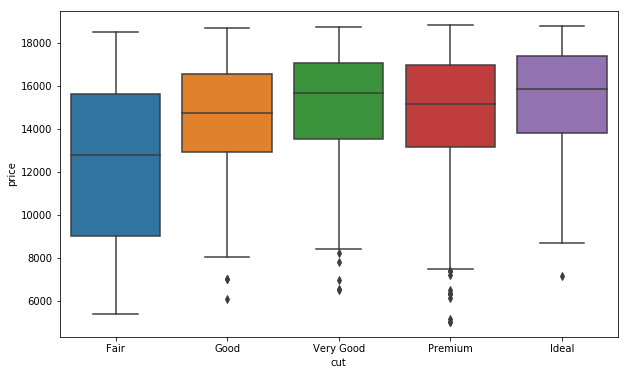

In [ ]:
plt.figure(figsize=(10, 6))
p = sns.boxplot(x='cut', y='price',order = ["Fair", "Good", "Very Good", "Premium", "Ideal"], data=df[df.x > 8])

Nevertheless, when filtering diamonds with x > 8mm (big diamonds). Ideal cuts are more expensive.

**Price vs Color**

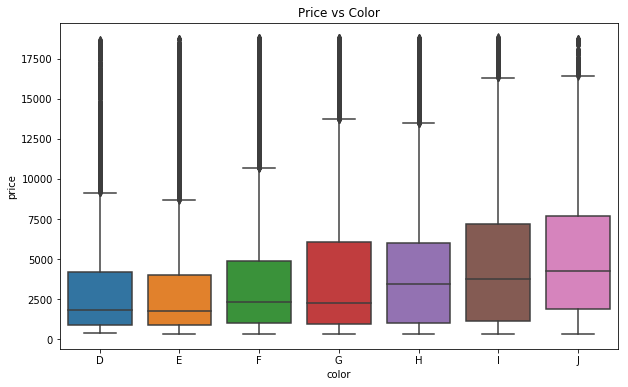

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Price vs Color')
p = sns.boxplot(x='color', y='price',order = ['D', 'E', 'F', 'G', 'H', 'I', 'J'], data=df)

It looks like there is a strong correlation between price and color.

**Price vs Clarity**

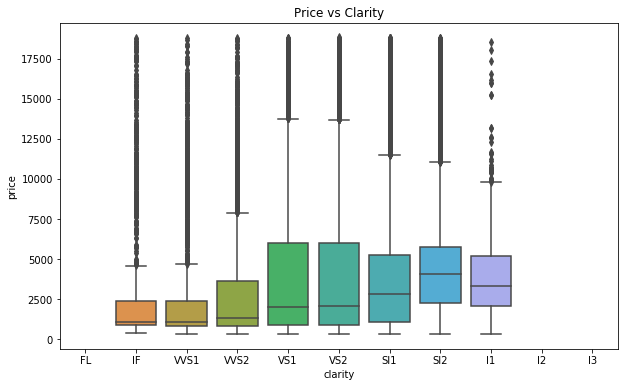

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Price vs Clarity')
p = sns.boxplot(x='clarity', y='price',order = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2',  'SI1', 'SI2', 'I1', 'I2', 'I3'], data=df)

It looks like there is a negative corralation between price and clarity.

From the description:

* cut:	Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal
* color:	Color of the diamond, with D being the best and J the worst
* clarity:	How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

We now convert the categorical values into numerical. 

In [ ]:
replace_vals = {"cut":     {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5},
                "color": {'D':7 , 'E': 6 , 'F':5 , 'G':4 , 'H':3 , 'I':2 , 'J':1 },
               "clarity": {'FL':11, 'IF':10, 'VVS1':9, 'VVS2':8, 'VS1':7, 'VS2':6 ,  'SI1':5, 'SI2':4, 'I1':3, 'I2':2, 'I3':1}}

In [ ]:
df.replace(replace_vals, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,4,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,5,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,7,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,6,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,4,63.3,58.0,335,4.34,4.35,2.75


## Pairplot

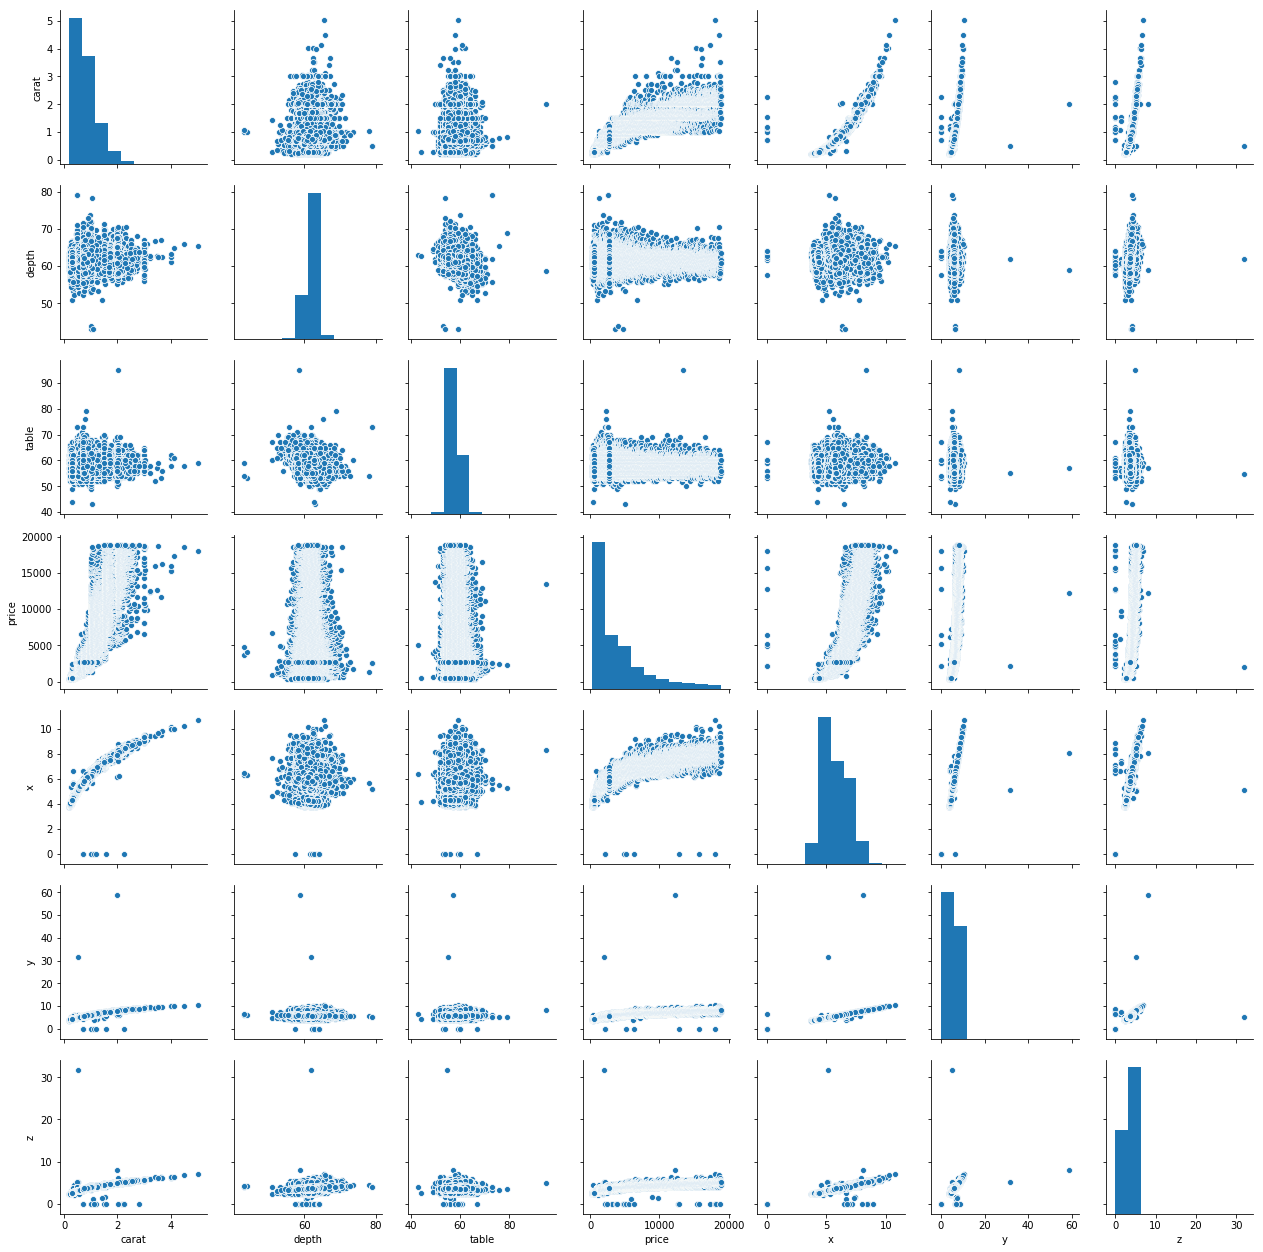

In [ ]:
p = sns.pairplot(df_cate)

There seem to be some outlayers in y and z. 


In [ ]:
outlayer_index = df[(df.z > 20) | (df.y > 20)].index
df[(df.z > 20) | (df.y > 20)]

,carat,cut,color,clarity,depth,table,price,x,y,z
24063,2.00,4,3,4,58.9,57.0,12210,8.09,58.90,8.06
48401,0.51,3,6,7,61.8,54.7,1970,5.12,5.15,31.80
49180,0.51,5,6,7,61.8,55.0,2075,5.15,31.80,5.12


We proceed to elimninate them

In [ ]:
df.drop(outlayer_index, inplace = True)

## Correlation between variables

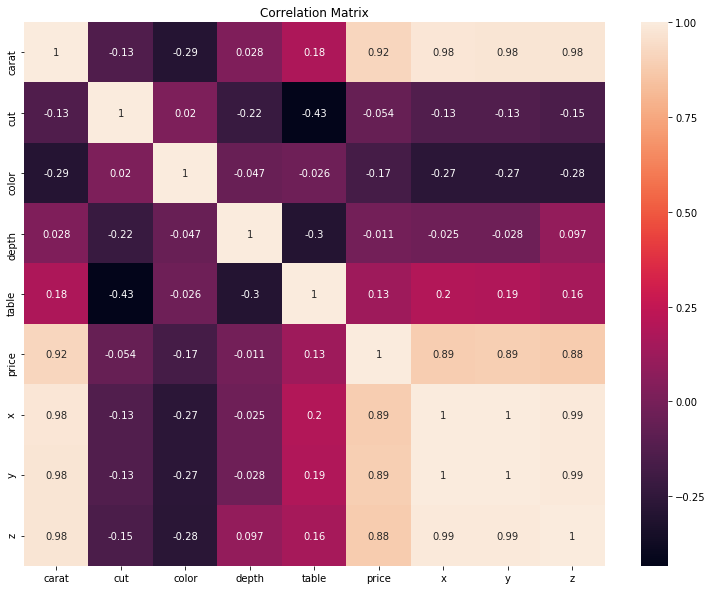

In [ ]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(), annot= True);
plt.title('Correlation Matrix');
plt.show()

## Hypothesis and modeling

It seems that, there is a strong collinearity between price, x, y, z and carat, which sounds reasonable given that diamonds and pearls are mostly valued by their carat and also, carat is a unit of mass which can be the reason between its relation with the axis columns (x, y, z).

Neverveless, this high collinearity between carat and the axis predictors could be harmful for the model. For the sake of comparison, we'll be using three models: Ridge Regression, Linear Regression and Random Forest in adition to two datasets; one with the axis variables and the other without them.

The reason of choosing the previous models was partly because of the correlation matrix and the exploratory analysis. What we could see was a mostly linear relationship between the price and the other predictors, hence the Linear and Ridge Regression. I chose Ridge Regression over Lasso Regression because of its capacity to shrink variables (but not eliminatate them) because there is still some correlation between cut, color, depth and table variables with the target. 

However, as I've just said, there is a mostly linear relationship between the target and the variables. So what I'm trying to do using a non-linear model such as Random Forest is to capture those cases where the relation between variables and target are non-linear (Ej. Price and Cut).

In [ ]:
df_noaxis = df[['carat', 'cut', 'color', 'depth', 'table', 'price']].copy()

In [ ]:

def data_prep(df):
    X =  df.drop(['price'],1)
    y =  df['price']
    return train_test_split(X, y, test_size=0.2)
  
def error_measure(y_test, y_pred):  
    print('MAE: ', mean_absolute_error(y_test, y_pred))
    print('MSE: ', mean_squared_error(y_test, y_pred))
    
def model_forest(df):
    X_train, X_test, y_train, y_test = data_prep(df)

    randomforest = RandomForestRegressor(max_depth=5, 
                                     random_state=12, 
                                     n_estimators = 1000)

    random_fit = randomforest.fit(X_train, y_train)

    y_pred = randomforest.predict(X_test)

    print('Random forest Score: ', random_fit.score(X_test, y_test))
    error_measure(y_test, y_pred)  
  
  
def model_ridge(df):
    X_train, X_test, y_train, y_test = data_prep(df)

    alphas = [.01,.1,1,10,100,1000,10000]

    ridge = RidgeCV(alphas = alphas, cv = 10) 
    ridge_fit = ridge.fit(X_train, y_train)

    y_pred = ridge_fit.predict(X_test)

    print('Ridge Regression Score: ', ridge_fit.score(X_test, y_test))
    error_measure(y_test, y_pred)  
  
def model_linear(df):
    X_train, X_test, y_train, y_test = data_prep(df)

    model = LinearRegression()
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    print('Linear regression Score: ', model.score(X_test, y_test))
    error_measure(y_test, y_pred)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
model_linear(df)
model_ridge(df)
model_forest(df)

model_linear(df_noaxis)
model_ridge(df_noaxis)
model_forest(df_noaxis)

Linear regression Score:  0.9068677764965819
MAE:  807.6537833067182
MSE:  1491756.0546495735
Ridge Regression Score:  0.9116827301408134
MAE:  791.3643046498445
MSE:  1362042.1820785666
Random forest Score:  0.949246254168873
MAE:  511.7703244400017
MSE:  796812.730665404
Linear regression Score:  0.867781167851765
MAE:  979.4332655523812
MSE:  2114351.309032256
Ridge Regression Score:  0.8664841220147921
MAE:  970.9447773806907
MSE:  2061208.4341796634
Random forest Score:  0.9025286095617634
MAE:  697.7242577521506
MSE:  1562120.640485656


From experiments run it is posible to say that the model works better using the axis variables and Random Forest was the model which achieved the highest score.

It is also worth noticing that Linear models did a good job predicting diamond price.  

In [ ]:
model_forest(df)

Random forest Score:  0.9449907975222049
MAE:  535.1083045797648
MSE:  885044.5542383123


After thise experiments and given that the main porpouse of this proble is to predict diamond price, we can get away further from linearity and interpretability to try to improve our best model using **Grid Search** to select the best hyperparameters.

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def grid_model_forest(df):
    X_train, X_test, y_train, y_test = data_prep(df)

    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={ 'max_depth': range(3,8),
                     'n_estimators': (10, 50, 100, 1000)},
        cv=5, 
        scoring='neg_mean_squared_error', 
        verbose=0, 
        n_jobs=-1)

    grid_result = gsc.fit(X_train, y_train)
    best_params = grid_result.best_params_
    print('best_params', best_params)

    randomforest = RandomForestRegressor(max_depth=best_params["max_depth"], 
                                     random_state=12, 
                                     n_estimators = best_params["n_estimators"])

    random_fit = randomforest.fit(X_train, y_train)

    y_pred = randomforest.predict(X_test)

    print('Grid Random forest Score: ', random_fit.score(X_test, y_test))
    error_measure(y_test, y_pred)  

In [ ]:
grid_model_forest(df)

best_params {'max_depth': 7, 'n_estimators': 50}
Grid Random forest Score:  0.9699116197793037
MAE:  382.501343567317
MSE:  477936.54167360737


The best model to predict the price of dimonds was Random Forest, using max_estimators = 50 and max_depth = 7 
